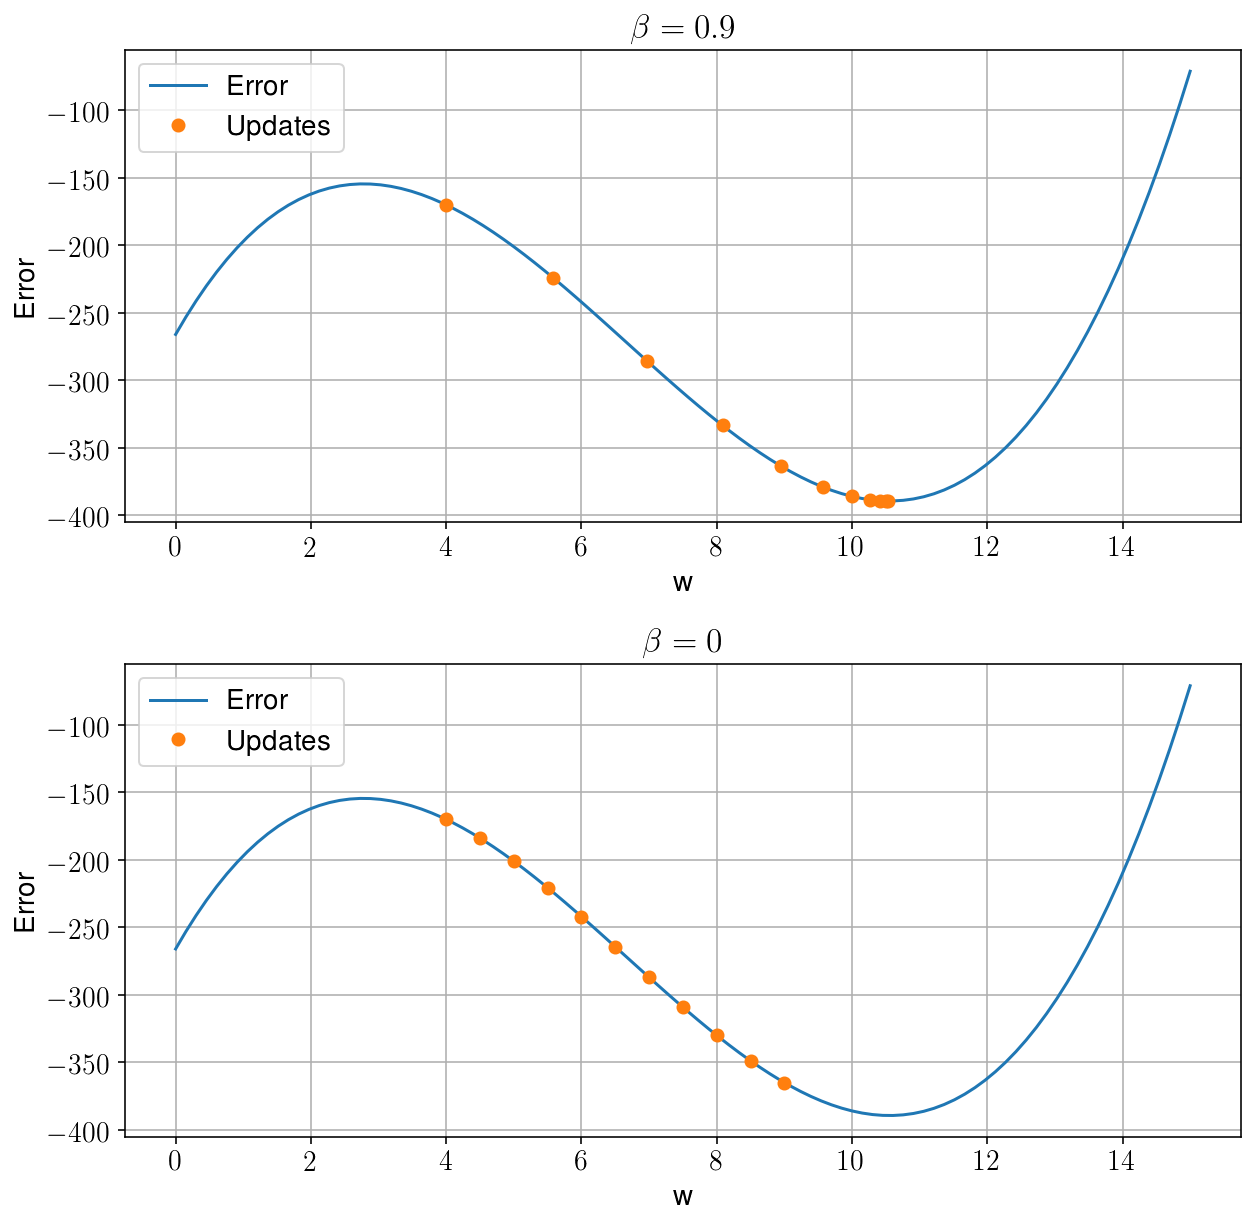

In [54]:
## import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np


def error(w):
    return -2 * (w + 5)**2 + (w - 6)**3


def error_grad(w):
    return -4 * (w + 5) + 3 * (w - 6)**2


def adaptive(eta, beta, iterations):
    epsilon = 10**(-8)
    w = np.zeros(iterations + 1)
    w[0] = 4
    s = np.zeros(iterations + 1)
    for i in range(0, iterations, 1):
        s[i + 1] = beta * s[i] + (1 - beta) * error_grad(w[i])**2
        w[i
          + 1] = w[i] - eta * (error_grad(w[i]) / np.sqrt(s[i + 1] + epsilon))

    return w


iterations = 10
z = np.linspace(0, 15, 100)

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots(2, 1)
ax[0].plot(z, error(z), label="Error")
ax[0].plot(
    adaptive(0.5, 0.9, iterations),
    error(adaptive(0.5, 0.9, iterations)),
    'o',
    label='Updates')
ax[0].set_xlabel('w')
ax[0].set_ylabel('Error')
ax[0].set_title(r"$\beta = 0.9$")
ax[0].grid()
ax[0].legend()

ax[1].plot(z, error(z), label="Error")
ax[1].plot(
    adaptive(0.5, 0, iterations),
    error(adaptive(0.5, 0, iterations)),
    'o',
    label='Updates')
ax[1].set_xlabel('w')
ax[1].set_ylabel('Error')
ax[1].set_title(r"$\beta = 0$")
ax[1].grid()
ax[1].legend()
plt.subplots_adjust(hspace=0.3)